# Classifying MNIST Images by Deep Network in Google TensorFlow

## Introduction
This tutorial will step by step guides you classify <a href='http://yann.lecun.com/exdb/mnist/'>MNIST</a> handwriten images using google TensorFlow APIs. In the first part, this tutorial will guide you install the tensorflow package, visualize MNIST image and build a basic classifier using a <a href='https://en.wikipedia.org/wiki/Softmax_function'>softmax</a> regression model. In the second part, you will build a Convolutional Neural Network with TensorFlow APIs to achieve a much higher accuracy classifying images. For people not familiar with Convolutional Neural Network, Stanford 231n course has very <a href = 'http://cs231n.github.io/convolutional-networks/'>illustractive introduction </a>.

## S1: Download the Google TensorFlow Package

Python 2.7 is used in this tutorial. The following steps assume you are using MAC OS X. For window or linux users, please check <a href='https://www.tensorflow.org/versions/r0.11/get_started/os_setup.html'>this page</a> for installation.

You might want to test if you have successfully installed TensorFlow by doing:

In [1]:
import tensorflow as tf
hello = tf.constant('TensorFlow is nothing but awesome!')
sess = tf.Session()
print(sess.run(hello))

TensorFlow is nothing but awesome!


If you see "TensorFlow is nothing but awesome!" in the output, then congratulations, you have installed the most awesome machine learning package in the world!

## S2: Import and Visualize MNIST Handwriten Images

You can download the MNIST data from Google TensorFlow APIs and the data will be stored in /tmp/data in your system. 
The MNIST dataset includes 55,000 handwriten images for training, 5,000 images for validation and 10,000 images for testing. Each handwriten image has  $28 \times 28$ pixels and stored in a rolling array $1 \times 764 $ pixels. The below codes will show you downloading of the dataset and display the first handwriten image using pyplot tool. 

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


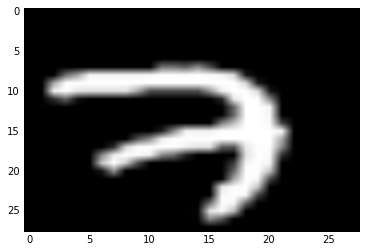

In [2]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# by default tensorflow download the data and store /tmp/data in your system
data_path = '/tmp/data'

# display any image whose index from 0 - 54,999
image_to_be_display = 0

mnist = input_data.read_data_sets(data_path, one_hot=True)
image_display = mnist.train.images[image_to_be_display]
plt.imshow(image_display.reshape(28, 28),aspect="auto",cmap='Greys_r')
plt.show()

You should be able to see digit 3 by running the above scripts. 

# S3  Building Basic Classifier -  Softmax Regression Model

## S3.1 Specifying the model parameters and variables

#### What is softmax regression model?

We all know linear regression model since we have finished bus schedule prediction project in homework3. In Classifying images, there is always one additional layer called softmax layer after the linear combination. The purpose of  <a href='https://en.wikipedia.org/wiki/Softmax_function'>softmax function</a> is transform and normalize the linear combination output, therefore, after softmax layer, each neuron will represent the possiblity of each possible digit. The one with greatest possibility will be final prediction.

The formula for softmax layer is:     $ softmax(y)_i =  \frac{exp(y_i)}{\sum_j exp(y_j)} $

where $y_i$ is output from linear combination.
                             
So far, we figured the pipeline of classifying model. Next, the input and output data format would be:

#### Input:
Features: For each handwritten image, there are $28 \times 28 = 764$ features (neurons in input layer). 
#### Bias: 
besides 764 neurons, we has one additional neuron for bias item
#### Output:
The output will be a vector indicating the possibility of each digit number from 0-9. The digit with most possibility in output layer would be the predicted digit.


### Now, Let's implement this model in tensorflow!

#### The placeholders

In Tensorflow, the placeholder is not a specific value. it is a value that we'll input when we ask TensorFlow to run a computation. For this problem, we need two placeholders as following:

In [3]:
# feature space x, model input. 
# here, None means we are unsure about the size value for first dimension.
x = tf.placeholder(tf.float32, [None, 784])

# true lable of image, for train the model
# here, None means we are unsure about the size value for first dimension.
y_ = tf.placeholder(tf.float32, [None, 10])

#### The Variables
The process of a regression model is training the parameters connecting input and output layers (i.e. weight $ w $) and the parameters connecting bias and output layers (i.e bias wight $ b $). For machine learning applications in tensorflow, we generally has the model parameters be Variables. Therefore, we will create Variable $W, b$ for training paramters. 

In the below, the $ y $  is the output of linear combination layer.

In [4]:
# Define model parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Output of linear combination layer
y = tf.matmul(x, W) + b

The following code will give you output after the softmax layer. We are not using it for now because we will use a more stable way to train the model

In [5]:
# Output of softmax layer
#y = tf.nn.softmax(tf.matmul(x, W) + b)

## S3.2 Train the Model using Stochastic Gradient Descent

The training process for softmax regression model is iteratively update the parameters to minimize the cost. The calculating of cost in this example is by evaluating the cross entropy between classified results and true labels:  

Cost_of_model = $ -\sum_i y_i^{true} log(y_i) $

here $y$ is our predicted probability distribution, and $y^{true}$ is the true distribution. For understanding how cross entropy works, check out this <a href ='http://colah.github.io/posts/2015-09-Visual-Information/'>tutorial</a>

Tensorflow provides this stable way to calculate and minimize the cross entropy.

In [6]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

After getting the cost function, we will iteratively update the parameters to minimize the cost function. The normal optimization methods is called gradient descent. In this tutorial, however, we will apply stochastic gradient descent to minimize the cost function due to there are too many(55,000) training samples. 

The goal for training is to obtain training variables that minimize the loss. For linear regression, it does not matter too much for values in initial variables. We just initialize all training parameters as zeros.


In [7]:
# The learning rate in Gradient Descent
learning_rate = 0.3
# Train the model to minimize the cross entropy
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
# Initial the training variables
init = tf.initialize_all_variables()

#### We can now launch the model in a Session!

Still remeber the placeholders we just defined? Here placeholders are used. Everytime we randomly choose 64 samples and feed them to placeholders $x$ and $y$_. The training takes me ~3 seconds to finish.

In [8]:
sess.run(init)
for i in range(1500):
  batch_xs, batch_ys = mnist.train.next_batch(64)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## S3.3 Visualize the training result and calculate the accuracy

First we need to get the classifed label and true label. We know $y$ in the below code is a $ 1 \times 10 $ vector that indicates the possibility of each digit. By tf.argmax we will get the digit with most possibility.

In [9]:
# get the digit with most possibility from classifying output
tf_classified_label = tf.argmax(y, 1)
# get the digit with most possibility from ground truth
tf_true_label = tf.argmax(y_, 1)

You could examine your trainning goodness in testing images now! 

In [10]:
# examine result from from_data to end_data
from_data = 1
end_data = 50
classified_label, true_label = (sess.run([tf_classified_label, tf_true_label], feed_dict={x: mnist.test.images[from_data:end_data],
                                      y_: mnist.test.labels[from_data:end_data]}))

print "Classifying result: " 
print classified_label
print "True label: "
print true_label

Classifying result: 
[2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1
 2 1 1 7 4 2 3 5 1 2 4 4]
True label: 
[2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1
 2 1 1 7 4 2 3 5 1 2 4 4]


You should be able to find some mis-classified images, because linear + softmax regression model is not able to well respresent the relationship of features between diffrent images. Visually examine the wrong-classified image: the 8th image should be 5 but was classifed as 6, the 33th image is 4, but was classified as 6

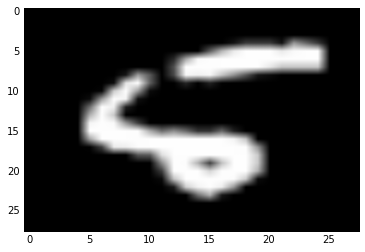

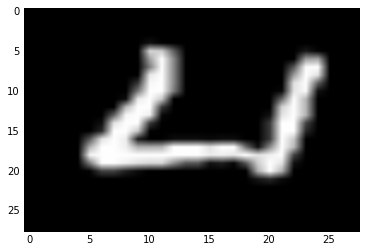

In [11]:
image_index_to_be_display = 8
image_display = mnist.test.images[image_index_to_be_display]
plt.imshow(image_display.reshape(28, 28),aspect="auto",cmap='Greys_r')
plt.show()
image_index_to_be_display = 33
image_display = mnist.test.images[image_index_to_be_display]
plt.imshow(image_display.reshape(28, 28),aspect="auto",cmap='Greys_r')
plt.show()

Count the number of images correctly classified, and then divide by total number of images, we will get the classifying accuracy of this model!

In [12]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf_classified_label, tf_true_label), tf.float32))
acc_result = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print acc_result

0.9206


Arround 92% accuracy is very bad! Next part I will guide you to build convolutional neural network to achieve a much more accurate classifier, a real one!

## S4 Building Awesome Classifer - Convolutional Neural Network (CNN) Model

From now, we will build a 7 layers Convolutional neural network to classify the MNIST images. This tutorial will walk you through all the layers in the CNN in high level and discuss the implementaion using tensorFlow. If you are interested in details and theories, please check this <a href = 'http://cs231n.github.io/convolutional-networks/' > incredible tutorial </a> developed by stanford 231 class. 

Different than traditional neural network, CNN apply local kernel filters (e.g. edge detector, corner detector) to extract local features, and then combine them together to do the classification. This saves a lots of computation and achieves very accurate classification result. 

In following Tutorial, we will build the 7 layers convolutional neural network using Google tensorFlow to do the MNIST image classifying tasks. The specification of each layer is:

- L1,   ** Input Layer **   
- L2,   ** First Convolutional Layer ** 
- L3,   ** First Pooling Layer ** 
- L4, ** Second Convolutional Layer ** 
- L5, ** Second Pooling Layer ** 
- L6, ** Fully Connected Layer ** 
- L7, ** Output Layer ** 

The below picture will give you an overview network we are going to build.

<img src="./pics/pic_overall.png">

This picture is drawed from  <a href = 'http://scs.ryerson.ca/~aharley/vis/conv/'> a Convolutional Network visualization tool </a>. Feel free to draw more examples and visually feel how CNN works.

Before we start, we are better clear variables using in the softmax regression model to avoid variable confusion problems.

In [13]:
# clear all variables used in softmax regression model
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


We will import necessary packages and data:

In [14]:
import tensorflow as tf
sess = tf.InteractiveSession()
from tensorflow.examples.tutorials.mnist import input_data
data_path = '/tmp/data'
mnist = input_data.read_data_sets(data_path, one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Layer1: Input layer

This layer we obtain the data from MNIST and reshape them into the data format that can be used in Convolutional neural network. In MNIST, each handwriten image are stored in a rolling array 1 x 764 pixels. We will reshape these images into 28 x 28 matrix so that the convolution between kernel and window in input image can be done easily. Therefore, in input layer, we will have one channel of 28 x 28 matrix.


In [15]:
# we set it as placeholder because the data will be feeded multiple times.
# None here denotes the number is this position is varied.
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# we reshape the input data into 28 x 28 matrix
# -1 here denotes the number is this position is varied.
# the 1 in last position in variable shape_to_use denotes there is only 1 channel in input layer
shape_to_use = [-1,28,28,1]
x_image = tf.reshape(x, shape_to_use)

## Layer2:  Convolutional layer

Convolutional layer applies different kernel filters on the input image to get different local features. If you are unfamiliar with kernel filters, there is a very good explanation <a href = 'https://en.wikipedia.org/wiki/Kernel_(image_processing)' > here </a>. Please read this page and have a basic idea what kernel filter is and why it can be used in image processing.

In implementation, we apply 32 kernels(each has 5 x 5 size) to convolute with the input image, so we will get 32 output channels. Each channel is the result of convolution of a kernel and the input image. The kernel values are initilized with a small amount of noise for symmetry breaking. Furthermore, we have a bias along with each kernel. The bias has a slightly positive initial value to be better used in <a href = 'https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'> ReLU </a> activation. 

The stride is the step size at each movement of the kernel. In convolutional layer, the stride size is typically set as 1 in horizontal direction and 1 in vertical direction.

<img src="./pics/pic1.png", height = 500, width = 500>

In [16]:
# define the weight intialization, weight intialization are associated with small noise for sysmetric breaking
def weight_init(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  weight_variable = tf.Variable(initial)
  return weight_variable

# define the bias intialization, bias intialization has small positive offset
def bias_init(shape):
  initial = tf.constant(0.1, shape=shape)
  bias_variable = tf.Variable(initial)
  return bias_variable

# define the convolution rule used in network. 
# not applied the paddation
# stride is  1 in horizontal direction and 1 in vertical direction 
# (only middle two numbers in strides variable matters)
def conv2d(x, W):
  stride_spec = [1, 1, 1, 1]
  return tf.nn.conv2d(x, W, strides=stride_spec, padding='SAME')

# initial kernel and bias
# the input is the original imgage in one channel
# the output is the convoluted imgage in 32 channels
W_conv1 = weight_init([5, 5, 1, 32])  # kernel
b_conv1 = bias_init([32])   # bias

# do the convolution
conv1_res = conv2d(x_image, W_conv1) + b_conv1
h_conv1 = tf.nn.relu(conv1_res)

## Layer3:  Pooling Layer

The pooling is a form of non-linear down-sampling. After extracting local features, the exact location is not as important as the rough location relative to other features. Therefore, we can reduce the amount of parameters by sampling from previous layer.
The pooling is presented in the below picture. we iterate every 2 x 2 window in convolutional layer with stride 2 and use the maximum value in each window to construct the pooling layer. 

<img src="./pics/pic2.png", height = 300, width = 300>

In [17]:
# define pooling function
# ksize is the size of down-sampling window in  convolutional layer. 
# in ksize=[1, 2, 2, 1] first and last number is always 1 in tensorFlow
# stride is the step size in the down sampling process 
# in strides=[1, 2, 2, 1] first and last number is always 1 in tensorFlow
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# do the pooling using 2 x 2 window and max fuction
h_pool1 = max_pool_2x2(h_conv1)

## Layer4 and Layer 5.  Second Convolutional and Pooling Layer

In order to further extract local features and reduce the size of parameters, we apply one more Convolutional and Pooling Layer. The number of channel will be 64 after applying the convolutional layer.

<img src="./pics/pic3.png">
<img src="./pics/pic4.png">

In [18]:
# Second Convolutional and Pooling Layer

W_conv2 = weight_init([5, 5, 32, 64])
b_conv2 = bias_init([64])

conv2_res = conv2d(h_pool1, W_conv2) + b_conv2
h_conv2 = tf.nn.relu(conv2_res)
h_pool2 = max_pool_2x2(h_conv2)

## Layer6:  Fully Connected Layer

In this layer, all local features are combined, and connected together to form global features. This layer is no different than the traditional neural layer. All neurons in previous layer and current layer are fully connected.
Specifically, there are 7 x 7 x 64 neurons from 2nd pooling layer, and there are 1024 neurons in fully connected layer. Therefore, there would be 7 x 7 x 64 x 1024 connection between two layers and 1024 additional connections for bias. This step connects all local features together and form the global features.
<img src="./pics/pic5.png">

In [19]:
# fully connect 7 * 7 * 64 neurons from 2nd pooling layer to 1024 neurons in fully connected layer
W_fc1 = weight_init([7 * 7 * 64, 1024])
b_fc1 = bias_init([1024])

# roll the neurons from 2nd pooling layer for better implementaion
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

## Layer7: Output Layer

Last layer will have 10 neurons that each corresponds to a classifying digit. Layer 6 and Layer 7 are also fully connected so all neurons between two layers are connected together. There will be also a softmax function applied in last layer that output the normalized possbilities. Each possbility corresponds to the confidence of guessing this digit correctly. The digit with greatest possibility will be the classifying result. In the below picture, we can see digit 6 is the classifying result.
<img src="./pics/pic6.png">

In [20]:
# Output layer (fully connected)
W_fc2 = weight_init([1024, 10])
b_fc2 = bias_init([10])

y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

## Train the Model using Stochatic Gradient Descent

In the first part of the tutorial we have already discussed about how to train a softmax regression model. The idea to train a convolution network is very similar. First we defined the loss function as the cross-entropy between model output y_conv and true value y_. Then we apply stochastic gradient descent to iterateively minimize the loss function, at the same time train the model and improve the paramters. The program will output train accuracy in every 100 iterations.

The below are the program that train the convolutional neural network on 55,000 MNIST images and test on 10,000 images. It takes my computer around 20 minutes for training in first 6,000 iterations and achieved 99.1% test accuracy. 

In [ ]:
#iter_time = 201
iter_time = 6000

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
accuracy = tf.reduce_mean(tf.cast( tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1)), tf.float32))
sess.run(tf.initialize_all_variables())

for i in range(iter_time):
  batch_xs, batch_ys = mnist.train.next_batch(64)
  train_step.run(feed_dict={x: batch_xs, y_: batch_ys})
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch_xs, y_: batch_ys})
    print("iter %d, train accuracy %f"%(i, train_accuracy))

print("test accuracy %g"% accuracy.eval(feed_dict={ x: mnist.test.images, y_: mnist.test.labels}))

### Reference
- [1] Deep MNIST for Experts, TensorFlow Documents: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html#deep-mnist-for-experts
- [2] MNIST For ML Beginners, TensorFlow Documents: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners
- [3] MNIST Visualization tool: http://scs.ryerson.ca/~aharley/vis/conv/
- [4] Convolutional Neural Network, Stanford 231 class http://cs231n.github.io/convolutional-networks/